In [1]:
import numpy as np
from numpy import linalg

Задание 1 Создайте numpy array с элементами от числа N до 0. Например, для N = 10 это будет array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])).

In [2]:
n = 10
a = np.arange(0, n)[::-1]
print(a)

[9 8 7 6 5 4 3 2 1 0]


Задание 2 Создайте диагональную матрицу с элементами от N до 0. Посчитайте сумму её значений на диагонали.

In [3]:
n = 10
matrix = np.diag(np.arange(n,0,-1))
print(sum(sum(matrix)))

55


Задание 3 Решите систему уравнений:

4x + 2y + z = 4
x + 3y = 12
5y + 4z = -3

In [4]:
a = np.array([[4,2,1],[1,3,0],[0,5,4]])
b = np.array([4,12,-3])
linalg.solve(a,b)

array([ 0.46666667,  3.84444444, -5.55555556])

Проверка верности

In [5]:
np.allclose( np.dot(a, linalg.solve(a, b)), b )

True

Задача 4 Имеется матрица покупок в интернет-магазине. Столбец А - ID пользователя. Остальные столбцы - количество покупок категорий товаров этим пользователем:

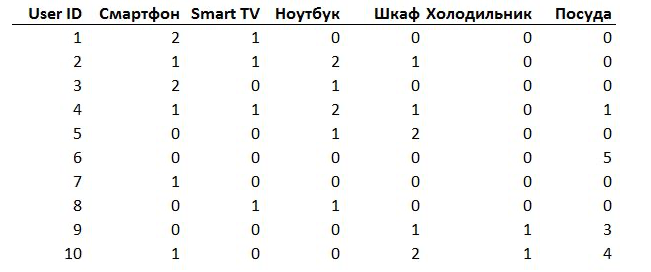

In [12]:
from IPython.display import Image
Image("user_matrix.JPG")

Матрица в виде numpy array

In [7]:
users_stats = np.array(
    [
        [2, 1, 0, 0, 0, 0],
        [1, 1, 2, 1, 0, 0],
        [2, 0, 1, 0, 0, 0],
        [1, 1, 2, 1, 0, 1],
        [0, 0, 1, 2, 0, 0],
        [0, 0, 0, 0, 0, 5],
        [1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 3],
        [1, 0, 0, 2, 1, 4]
    ], 
    np.int32
)

На сайт заходит очередной посетитель, о покупках которого известно следующее:

In [8]:
next_user_stats = np.array([0, 1, 2, 0, 0, 0])

Найдите самого похожего пользователя. Т. е. посчитайте косинусное сходство между этим пользователем и всеми пользователями из массива user_stats

1 вариант

In [9]:
cosine = np.dot(users_stats, next_user_stats)/(np.linalg.norm(users_stats, axis=1))/np.linalg.norm(next_user_stats)

idx = np.argmax(cosine)

print('ID пользователя:', idx + 1)
print(users_stats[idx])

ID пользователя: 8
[0 1 1 0 0 0]


2 вариант

In [10]:
def cosine(users_stats, next_user_stats):
    users_stats_Length = np.linalg.norm(users_stats)
    next_user_stats_Length = np.linalg.norm(next_user_stats)
    
    return np.dot(users_stats, next_user_stats) / (users_stats_Length * next_user_stats_Length)

muls = np.apply_along_axis(cosine, 1, users_stats, next_user_stats)

best_user = np.argmax(muls)

print('ID пользователя:', best_user + 1)
print(users_stats[best_user])

ID пользователя: 8
[0 1 1 0 0 0]


3 вариант

In [11]:
def cosine(users_stats, next_user_stats):
    users_stats_Length = np.linalg.norm(users_stats)
    next_user_stats_Length = np.linalg.norm(next_user_stats)
    
    return np.dot(users_stats, next_user_stats) / (users_stats_Length * next_user_stats_Length)

muls = []
for row in users_stats: 
    muls.append(cosine(row, next_user_stats))
print(np.argmax(muls) + 1)

8


Вывод: Исходя из полученных значений косинусных расстояний между векторами пользователей и нового пользователя можно сделать вывод, что самым похожим пользователем является пользователь номер 8. Можно предположить, что наш новый пользователь не против приобрести новый товар интернет-магазина.